In [1]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
%cd ..
os.getcwd()

c:\Users\HP\Desktop\E-Vision-Projects\Product_Count_API


'c:\\Users\\HP\\Desktop\\E-Vision-Projects\\Product_Count_API'

In [14]:
image_path = './data/test_images/IMG_2329.jpeg'
model_path = './data/models/obj_detect_yolov9.pt'
save_path = './data/test_output/' 

In [15]:
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Error: image_path does not exist")
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Error: model_path does not exist")

In [16]:
model = YOLO(model_path)

In [17]:
results = model.predict(source=image_path)


image 1/1 c:\Users\HP\Desktop\E-Vision-Projects\Product_Count_API\data\test_images\IMG_2329.jpeg: 640x480 34 products, 490.0ms
Speed: 2.8ms preprocess, 490.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


In [18]:
bounding_image = cv2.imread(image_path)
if bounding_image is None:
    raise ValueError(f"Error: Could not read image from path {bounding_image}")

In [19]:
bounding_image = cv2.cvtColor(bounding_image, cv2.COLOR_BGR2RGB)

In [20]:
# Iterate through detected objects and draw bounding boxes
for result in results:
    boxes = result.boxes  # Get detected bounding boxes
    names = result.names  # Get class names

    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        class_id = int(box.cls[0])  # Get class index
        confidence = box.conf[0]  # Confidence score

        # Get class label
        label = f"{names[class_id]}: {confidence:.2f}"

        # Draw bounding box
        cv2.rectangle(bounding_image, (x1, y1), (x2, y2), (0, 255, 0), 3)

        # Put label text
        cv2.putText(bounding_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

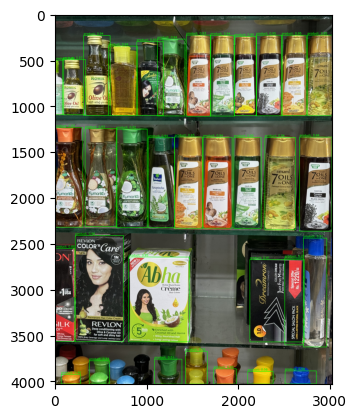

In [21]:
# resized_image = cv2.resize(bounding_image, (2024, 2024))
# Display the image with bounding boxes
plt.imshow(bounding_image)

In [22]:
cropped_image = []

image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Iterate through detected objects and draw bounding boxes
for result in results:
    boxes = result.boxes  # Get detected bounding boxes
    names = result.names  # Get class names

    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        # Crop the image
        cropped_image.append(image[y1:y2, x1:x2])

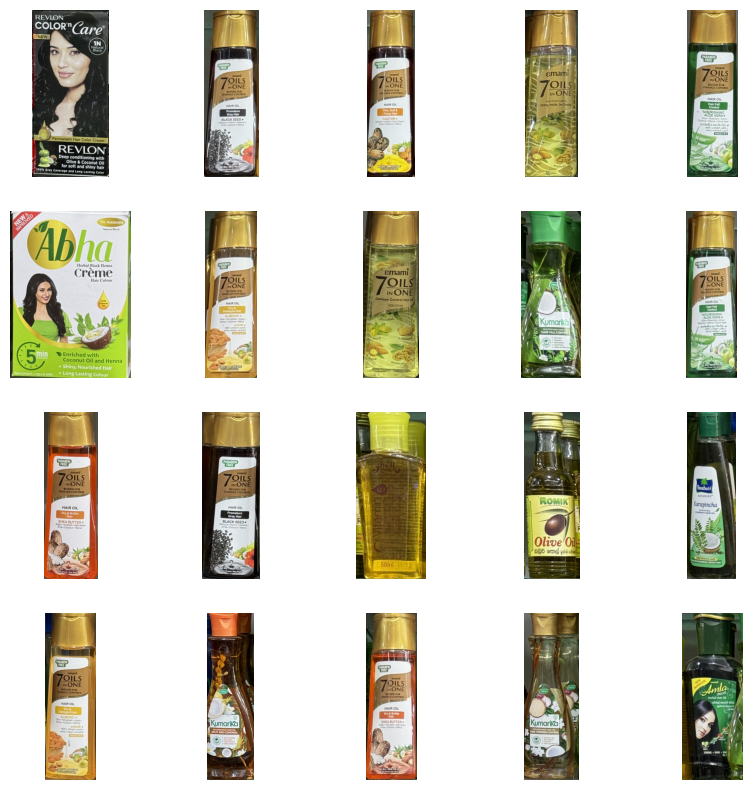

In [23]:
plt.figure(figsize=(10,10))
for i, img in enumerate(cropped_image[:20]):
    plt.subplot(4,5,i+1)
    plt.imshow(img)
    plt.axis('off')

In [26]:
for i, img in enumerate(cropped_image):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Save the cropped image
    cv2.imwrite(f'{save_path}cropped_image_{i+1}.jpg', img)